In [2]:
!pip install torch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2 torchtext==0.8.1
! [ -e /content ] && pip install -Uqq fastai
! pip install kaggle

     |████████████████████████████████| 776.8MB 21kB/s 
     |████████████████████████████████| 12.8MB 40.2MB/s 
     |████████████████████████████████| 7.6MB 31.7MB/s 
     |████████████████████████████████| 7.0MB 49.1MB/s 
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: torchtext 0.9.1
    Uninstalling torchtext-0.9.1:
      Successfully uninstalled torchtext-0.9.1
     |████████████████████████████████| 194kB 15.4MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 


In [8]:
from google.colab import files
from pathlib import Path
kaggle_key = (Path(".")) / "kaggle.json"
if not kaggle_key.exists():
  uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [9]:
!kaggle datasets list --user=umangjpatel

ref                                          title                            size  lastUpdated          downloadCount  
-------------------------------------------  -------------------------------  ----  -------------------  -------------  
umangjpatel/ham10000-imagenet-style-dataset  HAM10000 ImageNet-style dataset   3GB  2020-04-10 11:11:15             12  
umangjpatel/sipakmed-wsi                     Sipakmed WSI                      6GB  2021-04-02 00:22:50             16  


In [10]:
!kaggle datasets download umangjpatel/sipakmed-wsi -p="dataset" --unzip

100% 6.00G/6.01G [01:27<00:00, 59.6MB/s]
100% 6.01G/6.01G [01:27<00:00, 73.6MB/s]


In [19]:
from fastai import *
from fastai.vision.all import *
dataset_path = Path(".") / "dataset"


In [22]:
dls = ImageDataLoaders.from_folder(path = dataset_path, valid_pct=0.2, 
                                   item_tfms=Resize(224),
                                   batch_tfms = Resize(224),
                                   bs = 64,
                                   seed = 0)
dls

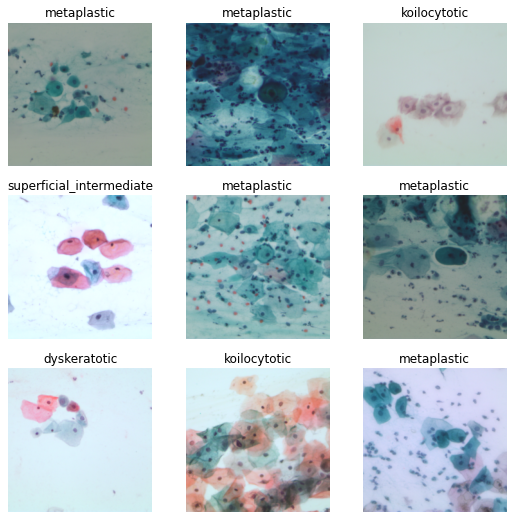

In [23]:
dls.show_batch()

In [26]:
models_dir = Path("models").mkdir(exist_ok=True)
learner = cnn_learner(dls=dls, arch=resnet18, 
                      pretrained=True, 
                      metrics=accuracy, 
                      model_dir=models_dir)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [27]:
learner.fine_tune(epochs=2)

epoch,train_loss,valid_loss,accuracy,time
0,1.943382,0.633744,0.808290,03:25


epoch,train_loss,valid_loss,accuracy,time
0,0.885540,0.436743,0.854922,04:20
1,0.614318,0.477575,0.844560,04:20


In [31]:
models_dir = Path("models").mkdir(exist_ok=True)
learner1 = cnn_learner(dls=dls, arch=densenet121,
                       pretrained=True,
                       metrics=accuracy,
                       model_dir=models_dir)

In [32]:
learner1.fine_tune(epochs=2)

epoch,train_loss,valid_loss,accuracy,time
0,1.929334,0.798569,0.766839,10:06


epoch,train_loss,valid_loss,accuracy,time
0,0.606259,0.538827,0.860104,11:17
1,0.392502,0.485696,0.865285,11:22


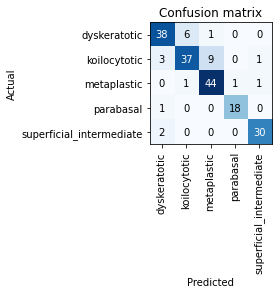

In [34]:
interp = ClassificationInterpretation.from_learner(learner1)
interp.plot_confusion_matrix()